# Netflix TV shows and movies Analysis

Netflix is a popular OTT platform which people all over the world use for entertainment. In this EDA (Exploratory Data Analysis)
I will explore the netflix dataset through visualisations and to answer some common question

### Importing necessary packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Loading dataset

In [2]:
netflix_df = pd.read_csv('netflix_titles.csv')
netflix_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


### Data Preparation and Cleaning
Now we will prepare our dataset for the analysis by cleaning it.

#### Checking for null values

In [3]:
netflix_df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

As we can see in the above table there are a few null values. 2634 under 'director', 825 under 'cast', 831 under 'country', 10 under 'date_added', 4 under 'rating' and 3 under 'duration'.

#### Handling null values
Dropping all rows containing null values is not a good idea as there will be loss of a lot of data which is not beneficial for EDA. Therefore what we can do is dropping those which has a few null values and filling those which has a lot of them

In [4]:
netflix_df['director'].fillna('No director',inplace=True)
netflix_df['cast'].fillna('Unknown',inplace=True)
netflix_df['country'].fillna('Not available',inplace=True)
netflix_df.dropna(subset=['date_added','rating','duration'],inplace=True)

In [5]:
netflix_df.isnull().any()

show_id         False
type            False
title           False
director        False
cast            False
country         False
date_added      False
release_year    False
rating          False
duration        False
listed_in       False
description     False
dtype: bool

For columns such as director, cast and country the good way is to fill the data as there are lot of null values in them which will lead to a loss of data. For date_added, rating and duration there are few null values so we can drop their respective rows.
After doing such, we can see there is no null values in our dataset.

#### Splitting the dataset
The netflix set contains both tv shows and movies. For more clarification and ease of analysis, we can split the dataset for each genre i.e shows and movies

In [6]:
shows_df=netflix_df[netflix_df['type'] == 'TV Show'].drop(['type'],axis=1).copy()
shows_df.head()

,show_id,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
1,s2,Blood & Water,No director,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Not available,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,Jailbirds New Orleans,No director,Unknown,Not available,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,Kota Factory,No director,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
5,s6,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",Not available,"September 24, 2021",2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...


In [7]:
movies_df=netflix_df[netflix_df['type'] == 'Movie'].drop(['type'],axis=1).copy()
movies_df.head()

,show_id,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
6,s7,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",Not available,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...
7,s8,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
9,s10,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...
12,s13,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic","September 23, 2021",2021,TV-MA,127 min,"Dramas, International Movies",After most of her family is murdered in a terr...


#### Data Preparation
In the duration column, there seems to be a irregularity between movies and series. Movies duration is based on the movie length where as in shows it is the number of season and both are not integers. To make EDA easier we can change the their types and rename the show columns to number of seasons.

In [8]:
shows_df.rename(columns={'duration':'seasons'},inplace=True)
shows_df.replace({'seasons':{'1 Season':'1 Seasons'}},inplace=True)
shows_df['seasons']=shows_df['seasons'].str.replace('Seasons','').astype(int)
movies_df['duration']=movies_df['duration'].str.replace('min','').astype(int)

### Exploratory Analysis and Visualisation
Let us revisit our original dataset.

In [9]:
netflix_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,No director,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Not available,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,No director,Unknown,Not available,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,No director,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


#### Number of TV shows vs number of movies
Let's visualise the number of TV shows and movies present in our dataset by using a bar graph.

In [10]:
sns.set_style('darkgrid')

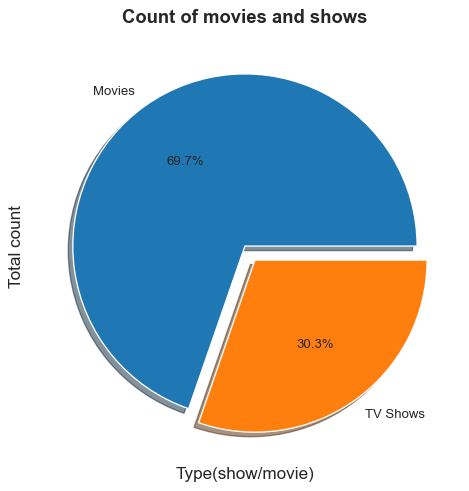

In [48]:
plt.figure(figsize=(6,6),dpi=95)
plt.title('Count of movies and shows',fontdict={'fontsize':14,'fontweight':'bold'})
explode=(0.0,0.1)
plt.pie(netflix_df['type'].value_counts(), labels = ['Movies', 'TV Shows'], explode = explode,
        autopct='%2.1f%%', shadow=True)
plt.xlabel('Type(show/movie)',fontdict={'fontsize':13})
plt.ylabel('Total count',fontdict={'fontsize':13});

#### Number of movies and shows based on rating

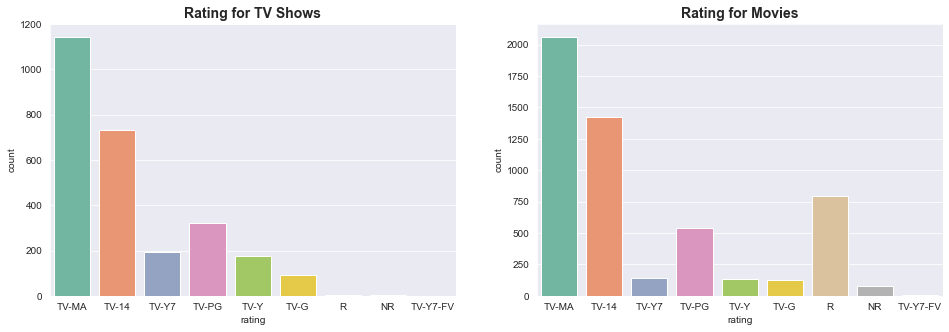

In [33]:
fig,axes=plt.subplots(1,2,figsize=(16,5))
seq=shows_df['rating'].unique()

axes[0].set_title('Rating for TV Shows',fontdict={'fontsize':14,'fontweight':'bold'})
axes[0].set_xlabel('Ratings')
axes[0].set_ylabel('Total Count')
sns.countplot(x = shows_df['rating'],palette='Set2',ax=axes[0],order=seq)

axes[1].set_title('Rating for Movies',fontdict={'fontsize':14,'fontweight':'bold'})
axes[1].set_xlabel('Ratings')
axes[1].set_ylabel('Total Count')
sns.countplot(x = movies_df['rating'],palette='Set2',ax=axes[1],order=seq);

Overall there is much more content for mature audience. There are more movies than shows for mature audience. However, for the younger audience, it is opposite, there is more movies than shows.

#### Distribution
Now we will look into the distribution of the movies and tv shows. Since movies are measured in time, we can visualise it through histogram and for tv shows we can plot a bar graph.

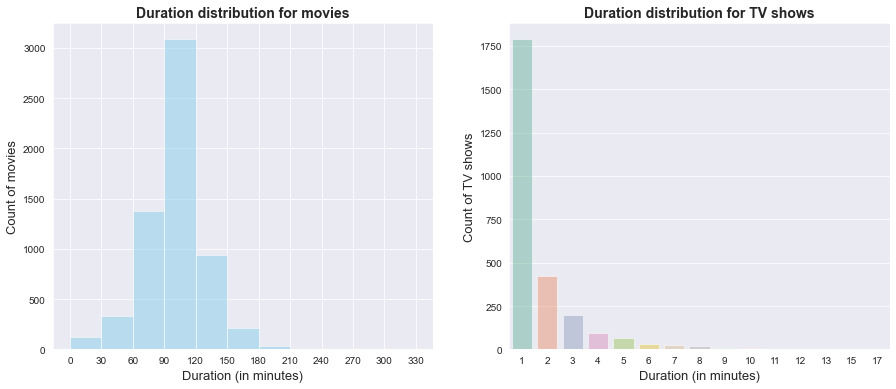

In [39]:
fig,axes=plt.subplots(1,2,figsize=(15,6))

axes[0].hist(movies_df['duration'],bins=np.arange(0,360,30),color='skyblue',alpha=0.5)
axes[0].set_xticks(np.arange(0,360,30))
axes[0].set_xlabel('Duration (in minutes)',fontdict={'fontsize':13})
axes[0].set_ylabel('Count of movies',fontdict={'fontsize':13})
axes[0].set_title('Duration distribution for movies',fontdict={'fontsize':14,'fontweight':'bold'})

sns.countplot(x = shows_df['seasons'],ax=axes[1],palette='Set2',alpha=0.5)
axes[1].set_xlabel('Duration (in minutes)',fontdict={'fontsize':13})
axes[1].set_ylabel('Count of TV shows',fontdict={'fontsize':13})
axes[1].set_title('Duration distribution for TV shows',fontdict={'fontsize':14,'fontweight':'bold'})
plt.show()

Maximum number of movies lie in the range 90-120 and most of the shows only end upto 1 season.

#### Change in the number of movies and TV shows over the years

Since, we only need the release year, therefore we will extract the year from the date_added column and add it to a new column

In [18]:
shows_df['year_added'] = pd.DatetimeIndex(shows_df['date_added']).year
movies_df['year_added']=pd.DatetimeIndex(movies_df['date_added']).year

In [19]:
movies_count=movies_df.groupby(['year_added'])[['date_added']].count().date_added
shows_count=shows_df.groupby(['year_added'])[['date_added']].count().date_added

In [20]:
movie_years=np.sort(movies_df['year_added'].unique(),axis=0)
show_years=np.sort(shows_df['year_added'].unique(),axis=0)

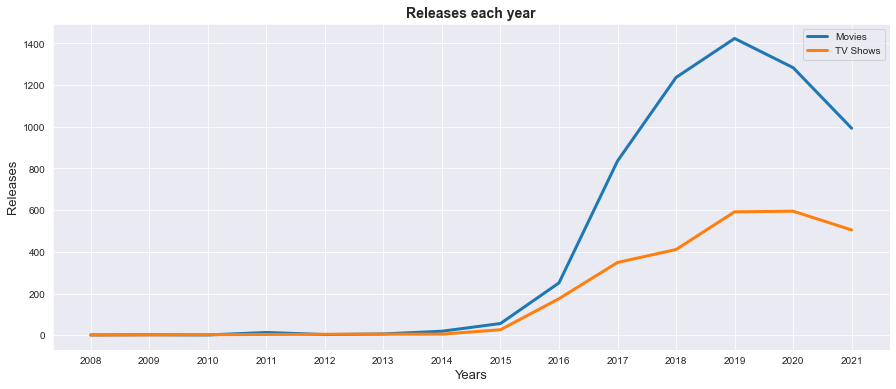

In [21]:
plt.figure(figsize=(15,6))
plt.title('Releases each year',fontdict={'fontsize':14,'fontweight':'bold'})
plt.xlabel('Years',fontdict={'fontsize':13})
plt.ylabel('Releases',fontdict={'fontsize':13})
plt.plot(movie_years,movies_count,lw=3)
plt.plot(show_years,shows_count,lw=3)
plt.xticks(np.arange(2008,2022,1))
plt.legend(['Movies','TV Shows']);

#### Countries with most content

In [22]:
filtered_movies=movies_df['country'].str.split(',',expand=True).stack().reset_index(drop=True)
filtered_movies=filtered_movies[filtered_movies != 'Not available'].str.strip()
filtered_shows=shows_df['country'].str.split(',',expand=True).stack().reset_index(drop=True)
filtered_shows=filtered_shows[filtered_shows != 'Not available'].str.strip()

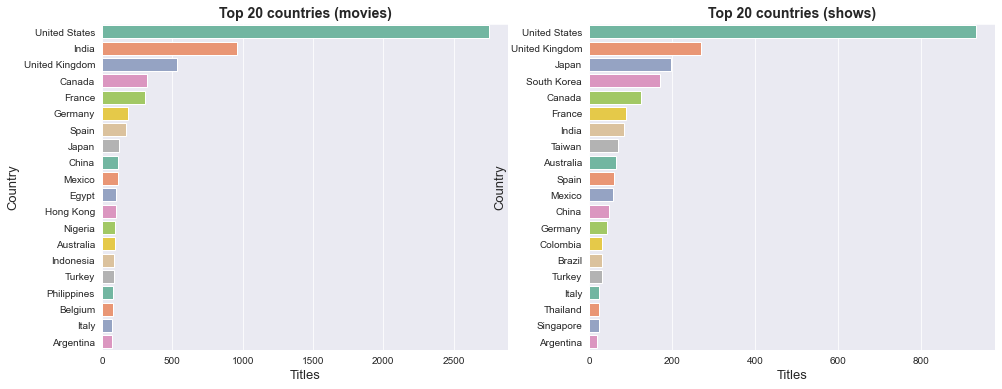

In [23]:
fig,axes=plt.subplots(1,2,figsize=(16,6))
sns.countplot(y=filtered_movies,ax=axes[0],order=filtered_movies.value_counts().index[:20],palette='Set2')
axes[0].set_title('Top 20 countries (movies)',fontdict={'fontsize':14,'fontweight':'bold'})
axes[0].set_xlabel('Titles',fontdict={'fontsize':13})
axes[0].set_ylabel('Country',fontdict={'fontsize':13})
sns.countplot(y=filtered_shows,ax=axes[1],order=filtered_shows.value_counts().index[:20],palette='Set2')
axes[1].set_title('Top 20 countries (shows)',fontdict={'fontsize':14,'fontweight':'bold'})
axes[1].set_xlabel('Titles',fontdict={'fontsize':13})
axes[1].set_ylabel('Country',fontdict={'fontsize':13});

US is in the top in both the sections which is expected as Netflix is a US company. UK ranks 2nd and 3rd in shows and movies where as India is 2nd in movies whereas it is low ranked in shows and a reason for that is India has more than one film industry. China despite of having a large population is ranked and a possible is the banning of certains shows / applications.

#### Most Popular Genres
Let's take a look at the most popular genres with movies and shows combined

In [24]:
filtered_genre=netflix_df['listed_in'].str.split(',',expand=True).stack().reset_index(drop=True).str.strip()

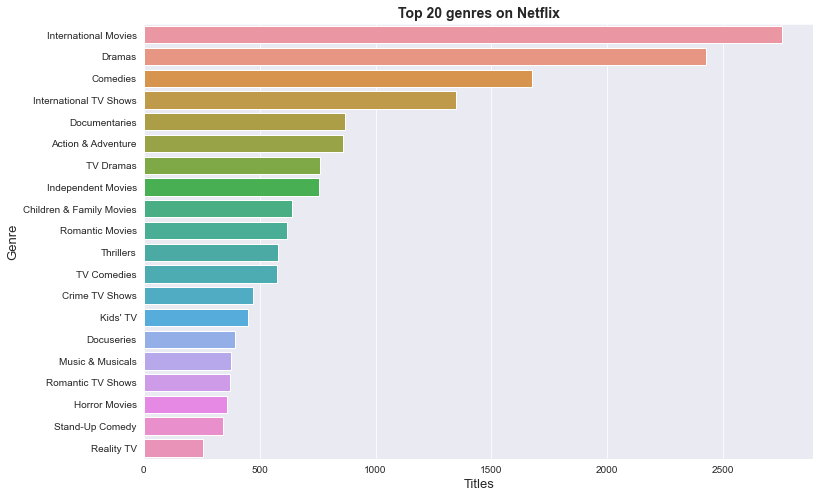

In [25]:
plt.figure(figsize=(12,8))
sns.countplot(y=filtered_genre,order=filtered_genre.value_counts().index[:20])
plt.title('Top 20 genres on Netflix',fontdict={'fontsize':14,'fontweight':'bold'})
plt.xlabel('Titles',fontdict={'fontsize':13})
plt.ylabel('Genre',fontdict={'fontsize':13});

The most popular genre is international followed by drama and comedy. Since netflix has wide range of subscribers all over the world, it was expected of international drama to be on top.

### Who are the top 10 directors with most number of releases?

In [26]:
directors=netflix_df['director'].str.split(',',expand=True).stack().reset_index(drop=True)
directors=directors[directors!='No director']


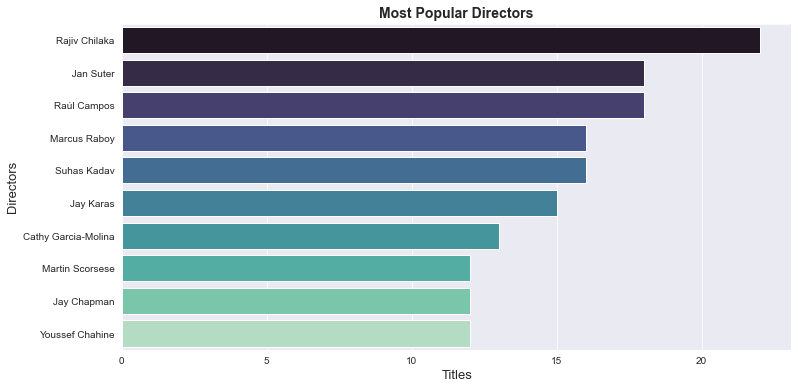

In [30]:
plt.figure(figsize=(12,6))
sns.countplot(y=directors,order=directors.value_counts().index[:10],palette='mako')
plt.title('Most Popular Directors',fontdict={'fontsize':14,'fontweight':'bold'})
plt.xlabel('Titles',fontdict={'fontsize':13})
plt.ylabel('Directors',fontdict={'fontsize':13});

Surprisingly Rajiv Chilaka tops the chart as he is the creator of famous cartoons in India which are also available on Netflix.
Other than him there are mostly western directors.

### Who are the top 10 actors on Netflix?

In [28]:
filtered_actors=netflix_df['cast'].str.split(',',expand=True).stack().reset_index(drop=True).str.strip()
filtered_actors=filtered_actors[filtered_actors!='Unknown']

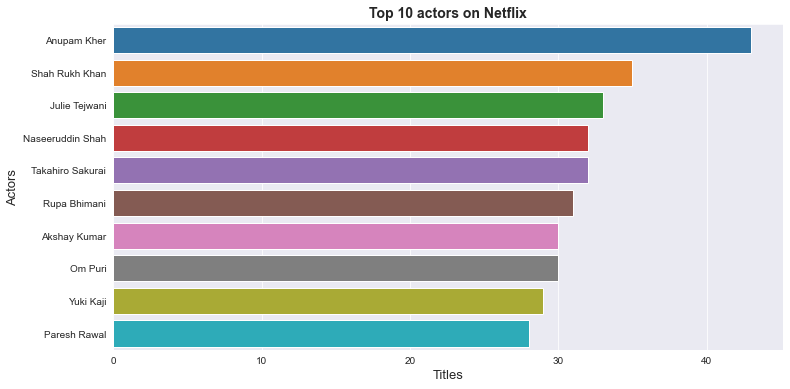

In [31]:
plt.figure(figsize=(12,6))
sns.countplot(y=filtered_actors,order=filtered_actors.value_counts().index[:10])
plt.title('Top 10 actors on Netflix',fontdict={'fontsize':14,'fontweight':'bold'})
plt.xlabel('Titles',fontdict={'fontsize':13})
plt.ylabel('Actors',fontdict={'fontsize':13});

The whole chart is dominated by Indian actors because of the huge number of films released every year.

## Conclusion
It is clear that the Netflix has grown tremendously over the years with the ease of internet access to everyone.
According to an article, Netflix has about 158.3 million subscribers with 60.6 million in US and 97.7 million internationally.
Most of Netflix's growth is likely to continue to come from international markets.

## References
* https://www.kaggle.com/datasets/shivamb/netflix-shows